In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import calc_volume, calc_diameter, kde_from_sample, interpolate_ages

In [3]:
d1 = 1
# 지름을 부피로
v1 = calc_volume(d1)
median_doubling_time = 811
rdt = 365 / median_doubling_time
interval = 9.0
doublings = interval * rdt
v2 = v1 * 2**doublings
# 부피를 지름으로
d2 = calc_diameter(v2)

In [4]:
v2, d2

(8.676351488087187, 2.5494480788327483)

In [5]:
rdts = [5.089,  3.572,  3.242,  2.642,  1.982,  1.847,  1.908,  1.798,
        1.798,  1.761,  2.703, -0.416,  0.024,  0.869,  0.746,  0.257,
        0.269,  0.086,  0.086,  1.321,  1.052,  1.076,  0.758,  0.587,
        0.367,  0.416,  0.073,  0.538,  0.281,  0.122, -0.869, -1.431,
        0.012,  0.037, -0.135,  0.122,  0.208,  0.245,  0.404,  0.648,
        0.673,  0.673,  0.563,  0.391,  0.049,  0.538,  0.514,  0.404,
        0.404,  0.33,  -0.061,  0.538,  0.306]
rdt_sample = np.array(rdts)

,probs
-2.00,0.000373
-1.96,0.000413
-1.92,0.000455
-1.88,0.000499
-1.84,0.000545
...,...
5.84,0.000198
5.88,0.000176
5.92,0.000155
5.96,0.000136


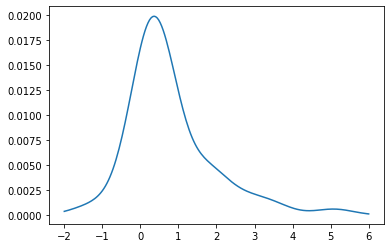

In [9]:
qs = np.linspace(-2, 6, 201)
pmf_rdt = kde_from_sample(rdt_sample, qs)
pmf_rdt.plot()
pmf_rdt

In [7]:
interval = 1
min_diameter = 0.3
max_diameter = 20

In [8]:
v0 = calc_volume(min_diameter)
vmax = calc_volume(max_diameter)
v0, vmax

(0.014137166941154066, 4188.790204786391)

In [10]:
def simulate_growth(pmf_rdt):
    age = 0
    volume = v0
    res = []
    
    while True:
        res.append((age, volume))
        if volume > vmax:
            break

        rdt = pmf_rdt.choice()
        age += interval 
        doublings = rdt * interval
        volume *= 2**doublings
        
    columns = ['age', 'volume']
    sim = pd.DataFrame(res, columns=columns)
    sim['diameter'] = calc_diameter(sim['volume'])
    return sim

In [12]:
sim = simulate_growth(pmf_rdt)
sim

,age,volume,diameter
0,0,0.014137,0.300000
1,1,0.017648,0.323021
2,2,0.083368,0.542001
3,3,0.315484,0.844616
4,4,0.452389,0.952441
5,5,1.068537,1.268422
6,6,10.671099,2.731514
7,7,18.071406,3.255850
8,8,25.913587,3.671495
9,9,136.772734,6.392445


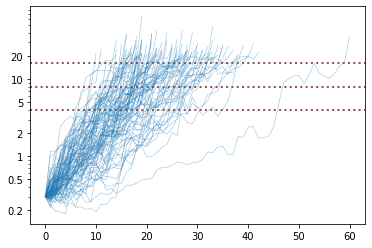

In [13]:
sims = [simulate_growth(pmf_rdt) for _ in range(101)]
for diameter in [4, 8, 16]:
    plt.axhline(diameter, color='C5', linewidth=2, ls=':')

for sim in sims:
    plt.plot(sim['age'], sim['diameter'], color='C0', linewidth=0.5, alpha=0.5)

plt.yscale('log')
yticks = [0.2, 0.5, 1, 2, 5, 10, 20]
plt.yticks(yticks, yticks)
plt.show()

In [14]:
ages = interpolate_ages(sims, 15)
cdf = Cdf.from_seq(ages)
cdf.median(), cdf.credible_interval(0.9), cdf(9.0)

(array(21.75723987), array([13.45835194, 35.98609596]), array(0.))